In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
curve = np.load("Precision_Recall_Curve.npy").item()
curve

{'Precision': array([0.23530156, 0.23525321, 0.23526808, ..., 1.        , 1.        ,
        1.        ]),
 'Recall': array([1.00000000e+00, 9.99731327e-01, 9.99731327e-01, ...,
        1.34336378e-03, 8.06018270e-04, 0.00000000e+00]),
 'Thresholds': array([0.00185904, 0.00186655, 0.00186741, ..., 0.9999997 , 0.99999976,
        0.9999999 ], dtype=float32)}

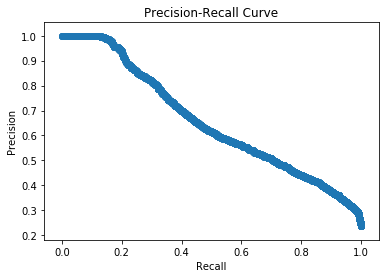

In [3]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

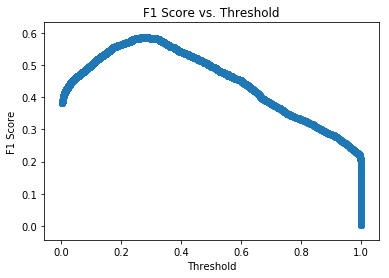

In [4]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

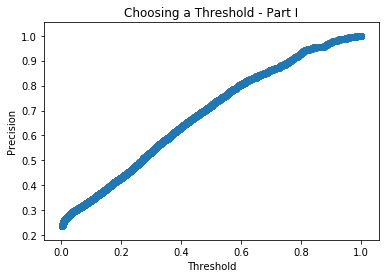

In [5]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

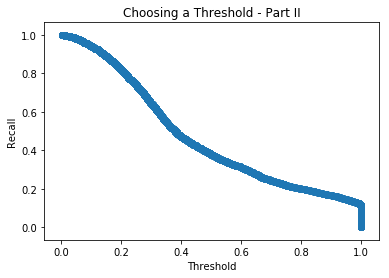

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [7]:
curve['Thresholds'][np.argmax(f1_scores)]

0.27307284